In [2]:
 # IGNORE WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY PACKAGES
import numpy  as np
# GENERATING RANDOM  OBJECTS

import random 
#  FOR  SYSTEM OPERATIONS

import os

# GENERATING PLOTS
import matplotlib.pyplot as plt

# IMAGE PREPRCESSING
from keras.preprocessing.image import load_img,img_to_array

#RESNET50 APPLICATIONS#
from keras.applications import ResNet50

# MODEL OBJECT
from keras.models import Model

# IMAGE OPERATIONS
import cv2

# ONE HOT ENCODING
from keras.utils import to_categorical

# SPLITTING DATA OPERATIONS
from sklearn.model_selection import train_test_split

# TRAINING NEURAL NETWORKS
from keras import regularizers, optimizers

# FULLY CONNCETD LAYERS AND FLATTENING OUTPUT
from keras.layers import Dense,Flatten

 # GENERATING SEQUENTIAL OBJECT
from keras.models import Sequential

# CALL BACKS
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# CLASSIFICATION METRICS
from sklearn.metrics import accuracy_score


# DEEP LEARNING MODEL OBJECTS  TO SAVE
from keras.models import model_from_json

 # DEEP LEARNING  PACKAGE SOURCE API
import keras


Using TensorFlow backend.


#### PATH WHERE FOLDER EXISTS

In [27]:
os.chdir('C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA')

In [28]:
os.getcwd()

'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA'

#### APPENDING PATH TO FOLDERS

In [4]:
labels=[]
root_folders=[]
for root,dir,filenames in os.walk(os.getcwd()):
    for i in dir:
        if i != None and i not in ['COVID','NON_COVID']:
            labels.append(i)
    root_folders.append(root)
        

In [5]:
root_folders = [i for i in root_folders if  not i.split('\\')[-1] in [ 'DATA']]
root_folders

['C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_0',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_1',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_10',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_11',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_12',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_13',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_14',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_15',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_16',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\D

#### A LIST CONTAINING TUBLE OF FOLDER PATH AND LABEL

In [6]:
labels_and_folders=[(i,j) for i,j in zip(labels,root_folders)]

#### folders function for proceesing the images in a folder by appending path

In [7]:
def folders(label,path):
    folder =[os.path.join(path+'\\'+ file) for file in os.listdir(path)]
    return folder

#### READ_IMAGES is a custom function by  processing the data  and returning an array

In [8]:
def READ_IMAGES(data):
    
    for img in range(len(data)):
        data[img] = load_img(data[img],target_size=(224,224,3),color_mode='rgb')     # REDAING IMAGES IN RGB MODE and#    RESIZING IMAGE INTO (224 X 224 x3)
        data[img] = img_to_array(data[img])
        data[img] = data[img]/255                                 #   scaling the value between 0 and 1
        data[img] = cv2.pow(data[img],0.6)                        # applying power transformation for enhancing images 
    return np.array(data)
        

#### feature_vector function predicts the output and returns mean of features

In [9]:
def feature_vector(model,image):
    ft_vector = model.predict(image)
    feature_vector = np.mean(ft_vector,axis=0)
    return feature_vector
        

#### LABELLING THE  TARGET

In [10]:
def Label(label):
        if label.startswith('non_covid_Patient'):
            return 0
        else:
            return 1


#### feature_vector2 function predicts the output and returns median of features¶

In [11]:
def feature_vector2(model,image):
    ft_vector = model.predict(image)
    feature_vector = np.median(ft_vector,axis=0)
    return feature_vector
        

#### SETTING RESNET  50 INTO NON -TRAINABLE

In [3]:
# importing resnet application
res_net =ResNet50(include_top=False,weights ='imagenet',input_shape =(224,224,3))
#taking the output layer
output =res_net.layers[-1].output
output = keras.layers.Flatten()(output)

# creating model instance object
Resnet_model = Model(res_net.input,output)

Resnet_model.trainable = False
for layer in Resnet_model.layers:
    layer.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


#### custom function for proceesing resnet  with mean of fatures

In [17]:
def resnet_with_mean(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector(res_net,img_list)
    target_label = Label(label)
    return img_features,target_label 

#### LIst  containing array of features and label

In [18]:
resnet_data=[]
for i,j in labels_and_folders:
    resnet_data.append(resnet_with_mean(i,j))

In [19]:
# target label
target_label_resnet_mean =[j for i,j in resnet_data]
# label encoding
target_label_resnet_mean=to_categorical(target_label_resnet_mean)

# features of array
features_mean_resnet=[i for i,j in resnet_data]


### splitting the data into train and test

In [21]:
resnet_mean_X_train,resnet_mean_X_test,resnet_mean_Y_train,resnet_mean_Y_test = train_test_split(features_mean_resnet,target_label_resnet_mean,test_size=0.2,random_state=142899)

print("THE NO.of Images in Training Data are : {} ".format(len(resnet_mean_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(resnet_mean_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


#### converting list of arrays into array of arrays

In [22]:
resnet_mean_X_train =np.array(resnet_mean_X_train)
resnet_mean_X_test =np.array(resnet_mean_X_test)

In [23]:
resnet_mean_X_train[0].shape

(7, 7, 2048)

#### DEFINING MODEL

In [25]:
resnet_model_mean=Sequential()
resnet_model_mean.add(Dense(256,input_shape=(7,7,2048),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


#resnet_model_mean.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
resnet_model_mean.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))

resnet_model_mean.add(Flatten())
resnet_model_mean.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
resnet_model_mean.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
resnet_mean_history=resnet_model_mean.fit(resnet_mean_X_train, resnet_mean_Y_train, validation_data=(resnet_mean_X_test,resnet_mean_Y_test ),
                                          epochs=100, batch_size=32, 
                                          callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 2s 10ms/step - loss: 9.7429 - acc: 0.5720 - val_loss: 8.0766 - val_acc: 0.6393
Epoch 2/100
243/243 [==============================] - 1s 4ms/step - loss: 6.2762 - acc: 0.6008 - val_loss: 5.4489 - val_acc: 0.6393
Epoch 3/100
243/243 [==============================] - 1s 4ms/step - loss: 4.6782 - acc: 0.6626 - val_loss: 3.9967 - val_acc: 0.3607
Epoch 4/100
243/243 [==============================] - 1s 4ms/step - loss: 3.5311 - acc: 0.6749 - val_loss: 3.2184 - val_acc: 0.6393
Epoch 5/100
243/243 [==============================] - 1s 4ms/step - loss: 2.8443 - acc: 0.6420 - val_loss: 2.6355 - val_acc: 0.6393
Epoch 6/100
243/243 [==============================] - 1s 4ms/step - loss: 2.3190 - acc: 0.7160 - val_loss: 2.2883 - val_acc: 0.6393
Epoch 7/100
243/243 [==============================] - 1s 4ms/step - loss: 1.9604 - acc: 0.7160 - val_loss: 1.8178 - val_acc: 0.6393
Epoch 8/100
243/243 [==

#### PLOTTING LOSS AND ACCURACY OF  MEAN OF FEATURES

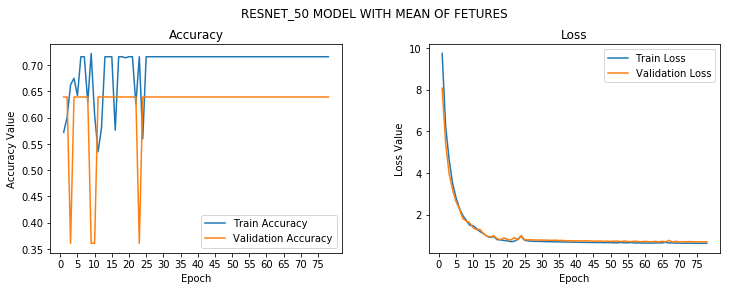

In [26]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('RESNET_50 MODEL WITH MEAN OF FETURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,79))
ax1.plot(epoch_list, resnet_mean_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, resnet_mean_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 79, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, resnet_mean_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, resnet_mean_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 79, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#### PREDICTIONS ON  MEAN OF FEATURES

In [27]:
resnet_mean_pred_train =resnet_model_mean.predict_classes(resnet_mean_X_train)
resnet_mean_pred_test =resnet_model_mean.predict_classes(resnet_mean_X_test)


#### LABELS FOR THE DATA

In [28]:
resnet_labels_train = np.argmax(resnet_mean_Y_train,axis=1)
resnet_labels_test = np.argmax(resnet_mean_Y_test,axis=1)


#### METRIC SCORE FOR THE MODEL

In [29]:
print("ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(resnet_labels_train ,resnet_mean_pred_train)))
      
      
print("ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(resnet_labels_test,resnet_mean_pred_test)))
      
      
            

ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TRAINING SET IS :0.7160493827160493
ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TEST SET IS :0.639344262295082


#### MODEL SERIALIZATION

In [30]:
# serialize model to JSON
model_json = resnet_model_mean.to_json()
with open("resnet50_mean.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
resnet_model_mean.save_weights("resnet50_mean.h5")
print("Saved model to disk")


Saved model to disk


#### RESNET 50  WITH MEDIAN OF FEATURES

#### FUNCTION FOR PROCESSING FOLDERS

In [29]:
def resnet_with_median(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector2(res_net,img_list)
    target_label = Label(label)
    return img_features,target_label 

In [14]:
resnet_data2=[]
for i,j in labels_and_folders:
    resnet_data2.append(resnet_with_median(i,j))

In [ ]:
#### target label
target_label_resnet_median =[j for i,j in resnet_data2]

# label encoding of arrays
target_label_resnet_median=to_categorical(target_label_resnet_median)


# features of median of arrays
features_median_resnet=[i for i,j in resnet_data2]

#### SPLITTING MEDIAN OF FEATURES DATA INTO TRAIN AND TEST

In [16]:
resnet_median_X_train,resnet_median_X_test,resnet_median_Y_train,resnet_median_Y_test = train_test_split(features_median_resnet,target_label_resnet_median,test_size=0.2,random_state=141199)

print("THE NO.of Images in Training Data are : {} ".format(len(resnet_median_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(resnet_median_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


#### CONVERTING LIST OF ARRAYS INTO ARRAY OF ARRAYS

In [17]:
resnet_median_X_train =np.array(resnet_median_X_train)
resnet_median_X_test =np.array(resnet_median_X_test)

#### RESNET MODEL FOR MEDIAN

In [19]:
resnet_model_median=Sequential()
resnet_model_median.add(Dense(256,input_shape=(7,7,2048),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


resnet_model_median.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))


resnet_model_median.add(Flatten())
resnet_model_median.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.0001, decay=0.005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
resnet_model_median.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
resnet_median_history=resnet_model_median.fit(resnet_median_X_train, resnet_median_Y_train, validation_data=(resnet_median_X_test,resnet_median_Y_test), epochs=100, batch_size=32, callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 4s 18ms/step - loss: 8.5220 - acc: 0.6543 - val_loss: 8.4035 - val_acc: 0.2377
Epoch 2/100
243/243 [==============================] - 1s 6ms/step - loss: 8.2799 - acc: 0.5247 - val_loss: 7.9964 - val_acc: 0.7705
Epoch 3/100
243/243 [==============================] - 1s 6ms/step - loss: 8.0246 - acc: 0.6831 - val_loss: 7.8110 - val_acc: 0.7705
Epoch 4/100
243/243 [==============================] - 1s 6ms/step - loss: 7.7597 - acc: 0.6831 - val_loss: 7.5197 - val_acc: 0.7705
Epoch 5/100
243/243 [==============================] - 2s 6ms/step - loss: 7.5287 - acc: 0.6831 - val_loss: 7.3315 - val_acc: 0.7705
Epoch 6/100
243/243 [==============================] - 1s 6ms/step - loss: 7.3166 - acc: 0.6831 - val_loss: 7.1181 - val_acc: 0.7705
Epoch 7/100
243/243 [==============================] - 1s 6ms/step - loss: 7.1122 - acc: 0.6831 - val_loss: 6.9510 - val_acc: 0.7705
Epoch 8/100
243/243 [==

Epoch 62/100
243/243 [==============================] - 1s 6ms/step - loss: 3.1615 - acc: 0.6831 - val_loss: 3.0865 - val_acc: 0.7705
Epoch 63/100
243/243 [==============================] - 2s 6ms/step - loss: 3.1336 - acc: 0.6831 - val_loss: 3.0482 - val_acc: 0.7705
Epoch 64/100
243/243 [==============================] - 2s 8ms/step - loss: 3.1124 - acc: 0.6831 - val_loss: 3.0143 - val_acc: 0.7705
Epoch 65/100
243/243 [==============================] - 2s 8ms/step - loss: 3.0846 - acc: 0.6831 - val_loss: 3.0074 - val_acc: 0.7705
Epoch 66/100
243/243 [==============================] - 2s 7ms/step - loss: 3.0578 - acc: 0.6831 - val_loss: 2.9638 - val_acc: 0.7705
Epoch 67/100
243/243 [==============================] - 2s 7ms/step - loss: 3.0274 - acc: 0.6831 - val_loss: 2.9459 - val_acc: 0.7705
Epoch 68/100
243/243 [==============================] - 2s 7ms/step - loss: 3.0059 - acc: 0.6831 - val_loss: 2.9278 - val_acc: 0.7705
Epoch 69/100
243/243 [==============================] - 2s 7ms

#### PLOTTING LOSS AND ACCURACY OF MEDIAN OF FEATURES

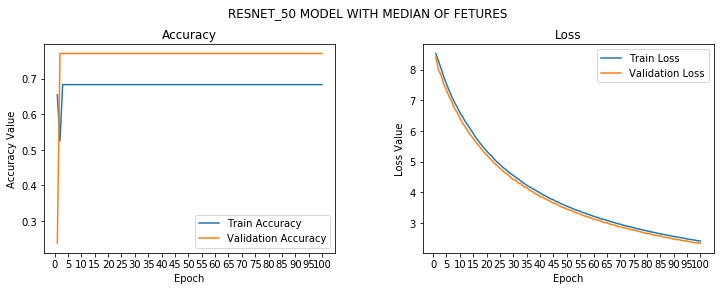

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('RESNET_50 MODEL WITH MEDIAN OF FETURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, resnet_median_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, resnet_median_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, resnet_median_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, resnet_median_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#### PREDICTIONS FOR MEDIAN OF FEATURES

In [22]:
 resnet_median_pred_train =resnet_model_median.predict_classes(resnet_median_X_train)
resnet_median_pred_test =resnet_model_median.predict_classes(resnet_median_X_test)


#### LABELS FOR MEDIAN OF FEATURES

In [23]:
resnet_labels_median_train = np.argmax(resnet_median_Y_train,axis=1)
resnet_labels_median_test = np.argmax(resnet_median_Y_test,axis=1)


#### METRIC SCORE FOR   MODEL

In [25]:
print("ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(resnet_labels_median_train ,resnet_median_pred_train)))
      
      
print("ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(resnet_labels_median_test,resnet_median_pred_test)))
      
      
            

ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TRAINING SET IS :0.6831275720164609
ACCURACY SCORE OF VGG19 with MEAN OF FEATURES ON TEST SET IS :0.7704918032786885


#### MODEL SERIALIZATION

In [30]:
# serialize model to JSON
model_json = resnet_model_median.to_json()
with open("resnet50_median.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
resnet_model_median.save_weights("resnet50_median.h5")
print("Saved model to disk")


Saved model to disk
